In [159]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [160]:
#read dataset
dataset = pd.read_csv('I:\PycharmProjects\Datasets\icml_face_data.csv')
print(dataset.shape)
print(dataset.head())

(35887, 3)
   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [161]:
#separate data into X and Y
emotions = dataset['emotion']
pixels = dataset['pixels']
print(emotions.head())
print(pixels.head())

0    0
1    0
2    2
3    4
4    6
Name: emotion, dtype: int64
0    70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1    151 150 147 155 148 133 111 140 170 174 182 15...
2    231 212 156 164 174 138 161 173 182 200 106 38...
3    24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4    4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
Name: pixels, dtype: object


In [138]:
#convert pixels into images and normalize values
datapoints = pixels.tolist()
X = []
for i in datapoints:
    arr = [int(num) for num in i.split(' ')]
    arr = np.asarray(arr).reshape(48, 48)
    X.append(arr.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

print(X)

[[[[ 70.]
   [ 80.]
   [ 82.]
   ...
   [ 52.]
   [ 43.]
   [ 41.]]

  [[ 65.]
   [ 61.]
   [ 58.]
   ...
   [ 56.]
   [ 52.]
   [ 44.]]

  [[ 50.]
   [ 43.]
   [ 54.]
   ...
   [ 49.]
   [ 56.]
   [ 47.]]

  ...

  [[ 91.]
   [ 65.]
   [ 42.]
   ...
   [ 72.]
   [ 56.]
   [ 43.]]

  [[ 77.]
   [ 82.]
   [ 79.]
   ...
   [105.]
   [ 70.]
   [ 46.]]

  [[ 77.]
   [ 72.]
   [ 84.]
   ...
   [106.]
   [109.]
   [ 82.]]]


 [[[151.]
   [150.]
   [147.]
   ...
   [129.]
   [140.]
   [120.]]

  [[151.]
   [149.]
   [149.]
   ...
   [122.]
   [141.]
   [137.]]

  [[151.]
   [151.]
   [156.]
   ...
   [109.]
   [123.]
   [146.]]

  ...

  [[188.]
   [188.]
   [121.]
   ...
   [185.]
   [185.]
   [186.]]

  [[188.]
   [187.]
   [196.]
   ...
   [186.]
   [182.]
   [187.]]

  [[186.]
   [184.]
   [185.]
   ...
   [193.]
   [183.]
   [184.]]]


 [[[231.]
   [212.]
   [156.]
   ...
   [ 44.]
   [ 27.]
   [ 16.]]

  [[229.]
   [175.]
   [148.]
   ...
   [ 27.]
   [ 35.]
   [ 27.]]

  [[214.]
   [15

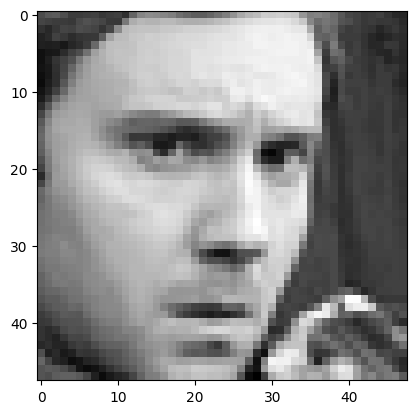

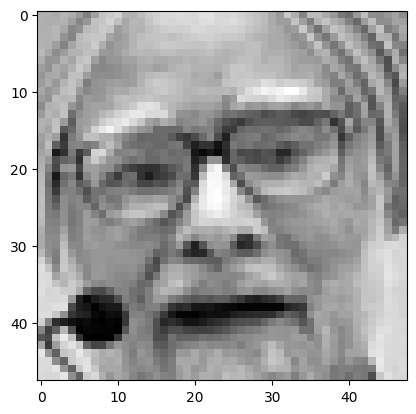

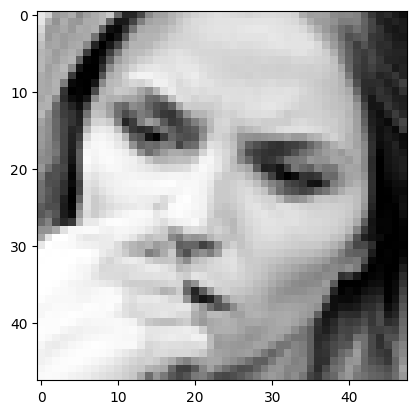

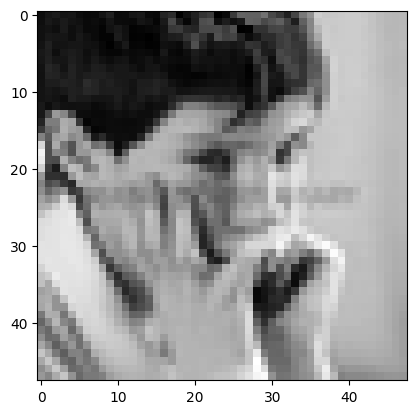

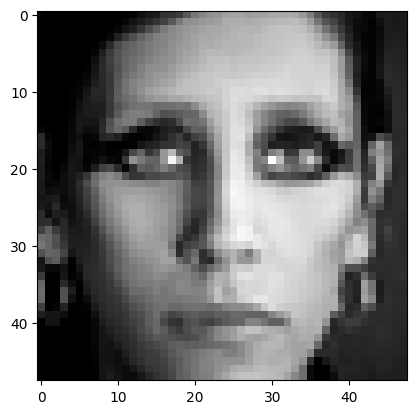

In [139]:
#show first 5 images of data
for i in range(5):
    plt.figure(i)
    plt.imshow(X[i], cmap='gray')
plt.show()

In [169]:
#split data into train and test subsets
xtrain, xtest, ytrain, ytest = train_test_split(X, emotions, test_size=0.2, shuffle=True)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain[3])



(28709, 48, 48, 1)
(28709,)
(7178, 48, 48, 1)
(7178,)
4


In [164]:
#parameters
learningRate = 0.001
batch = 64
epochs = 10
imgSize = (48,48,1)
classes = 7

In [170]:
#transform the label data to a binary matrix so that it can work with the loss function
ytrain = keras.utils.to_categorical(ytrain, classes)
ytest = keras.utils.to_categorical(ytest, classes)

In [180]:
#define the CNN and print the summary
model = keras.Sequential([
    keras.Input(shape=imgSize),

    # Here we normalize the input image and rescale the rgb values from the range [0,255] to [0,1]
    keras.layers.Rescaling(scale=1./255, input_shape=(imgSize)), 

    #first convolutional block
    layers.Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    #second convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    #third convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),
    

    #Fully connected layer
    layers.Flatten(),
    layers.Dropout(0.2),
    

    #Output Layer
    layers.Dense(classes, activation='relu')
    
])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_89 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 batch_normalization_89 (Bat  (None, 46, 46, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 23, 23, 16)        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 21, 21, 32)      

In [181]:
#define the loss function and optimizer with the learning rate
optim = keras.optimizers.Adam(learning_rate=learningRate)
lossFn = tf.keras.losses.CategoricalCrossentropy() #we use CategoricalCrossEntropy for the loss because we have 7 classes

#Compile and Train the model
model.compile(loss=lossFn, optimizer=optim, metrics=["accuracy"])
stats = model.fit(xtrain, ytrain, batch_size=batch, epochs=epochs, validation_split=0.1)

Epoch 1/10
404/404 [==============================] - 23s 57ms/step - loss: 2.1612 - accuracy: 0.2424 - val_loss: 3.2037 - val_accuracy: 0.2724
Epoch 2/10
404/404 [==============================] - 22s 56ms/step - loss: 1.9240 - accuracy: 0.2866 - val_loss: 2.0065 - val_accuracy: 0.3487
Epoch 3/10
404/404 [==============================] - 23s 57ms/step - loss: 1.8892 - accuracy: 0.3279 - val_loss: 2.3931 - val_accuracy: 0.3807
Epoch 4/10
404/404 [==============================] - 23s 56ms/step - loss: 1.8659 - accuracy: 0.3523 - val_loss: 1.8732 - val_accuracy: 0.3333
Epoch 5/10
404/404 [==============================] - 23s 56ms/step - loss: 1.9018 - accuracy: 0.3203 - val_loss: 2.0682 - val_accuracy: 0.3441
Epoch 6/10
404/404 [==============================] - 23s 56ms/step - loss: 1.8607 - accuracy: 0.3535 - val_loss: 1.8804 - val_accuracy: 0.3842
Epoch 7/10
404/404 [==============================] - 22s 56ms/step - loss: 1.8713 - accuracy: 0.3489 - val_loss: 1.8413 - val_accuracy:

In [182]:
#Evaluate the model on the test data
results = model.evaluate(xtest, ytest)
print("ACCURACY:", results[1])

225/225 [==============================] - 2s 10ms/step - loss: 1.7714 - accuracy: 0.3823
ACCURACY: 0.3822791874408722


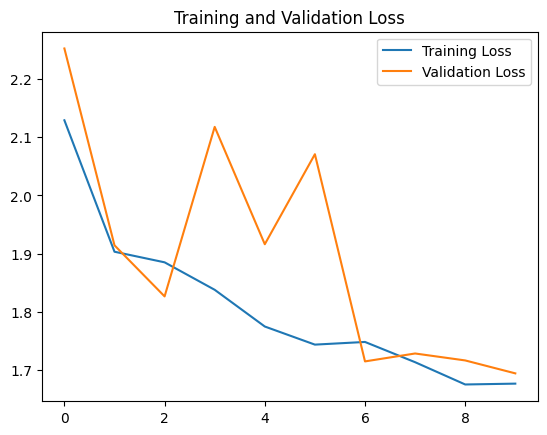

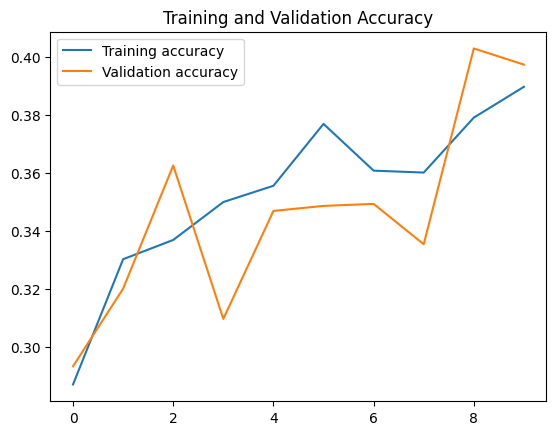

In [175]:
#Graph the losses and accuracies
plt.plot(range(epochs), stats.history["loss"])
plt.plot(range(epochs), stats.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Training and Validation Loss")
plt.show()
plt.plot(range(epochs), stats.history["accuracy"])
plt.plot(range(epochs), stats.history["val_accuracy"])
plt.legend(["Training accuracy", "Validation accuracy"])
plt.title("Training and Validation Accuracy")
plt.show()